# Módulo de Programação Python

# Trilha Python - Aula 35/36: Visualização de dados: Outros Pacotes para visualização

<img align="center" style="padding-right:10px;" src="Figuras/aula-27_fig_01.png">

## Gráficos com Pandas



In [1]:
def printVersions(pacotes):
    for pacote in pacotes:
        try:
            print(f'{pacote} version: {pacote.__version__}')
        except ImportError:
            print(f'{pacote} is not installed')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
printVersions([np, pd, mplt, sns])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
<module 'numpy' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/numpy/__init__.py'> version: 1.26.2
<module 'pandas' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/pandas/__init__.py'> version: 2.1.4
<module 'matplotlib' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/matplotlib/__init__.py'> version: 3.8.2
<module 'seaborn' from '/opt/anaconda3/envs/pyTIC18/lib/python3.10/site-packages/seaborn/__init__.py'> version: 0.13.1


O método ``plot`` em ``Series`` e ``DataFrame`` é apenas um _wrapper_ simples em torno da função ``plt.plot``

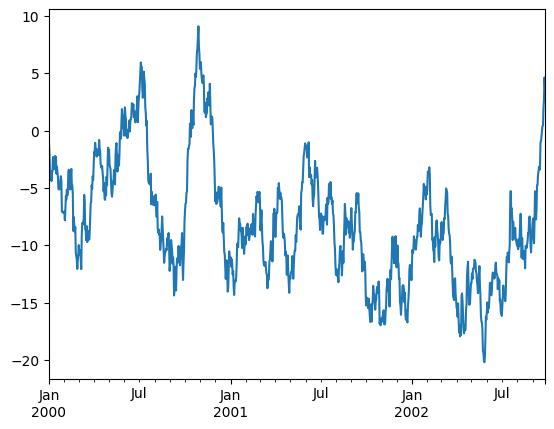

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

Se o índice consistir em datas, o método chama ``gcf().autofmt_xdate()`` para tentar formatar de forma apropriada o eixo x conforme acima. O método usa também diversos argumentos para controlar a aparência do gráfico.

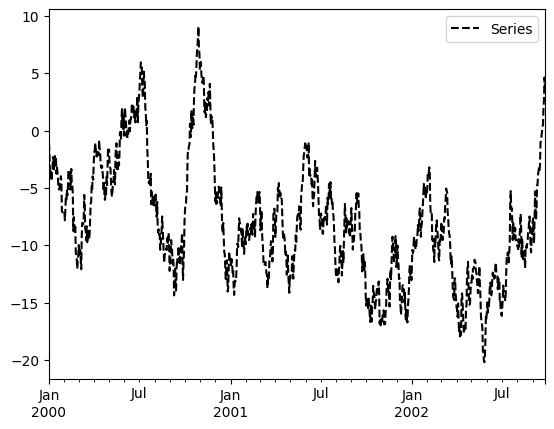

In [4]:
plt.figure() 
ts.plot(style='k--', label='Series') 
plt.legend()

No DataFrame, ``plot`` é configurado para plotar todas as colunas com rótulos.

<Figure size 640x480 with 0 Axes>

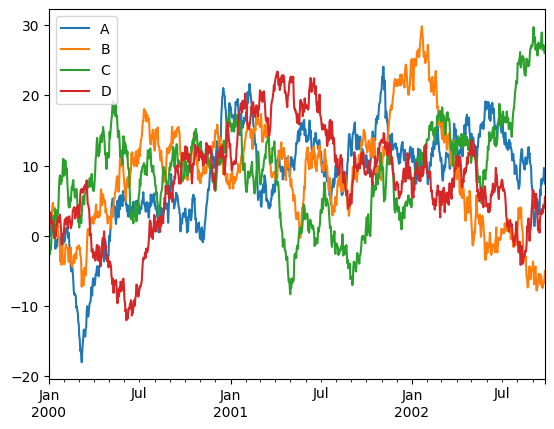

In [6]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best');

Podemos definir o argumento da legenda como ``False`` para ocultar a mesma, que é mostrada por padrão.

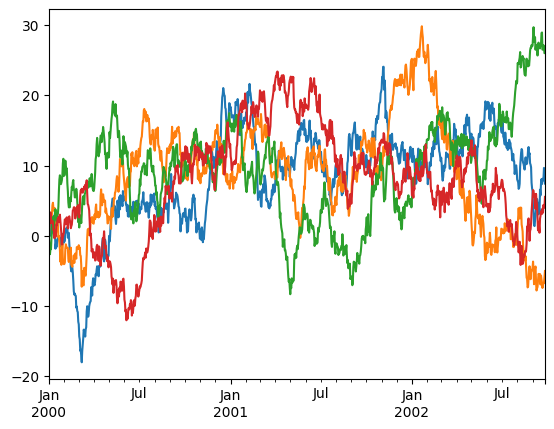

In [7]:
df.plot(legend=False);

Algumas outras opções estão disponíveis, como plotar cada série em um eixo diferente.

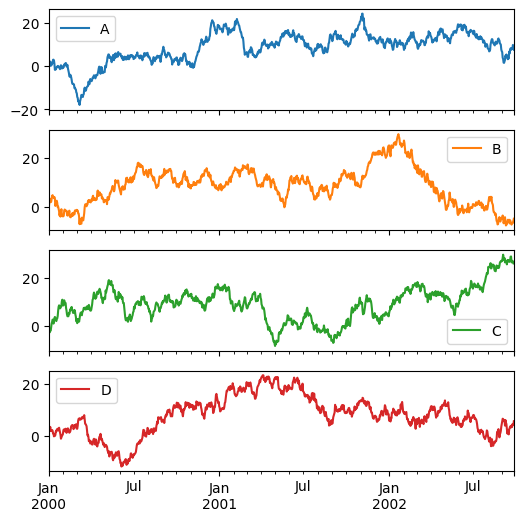

In [8]:
df.plot(subplots=True, figsize=(6, 6)) 
plt.legend(loc='best');

Você pode passar ``logy`` para obter um eixo Y em escala logarítmica

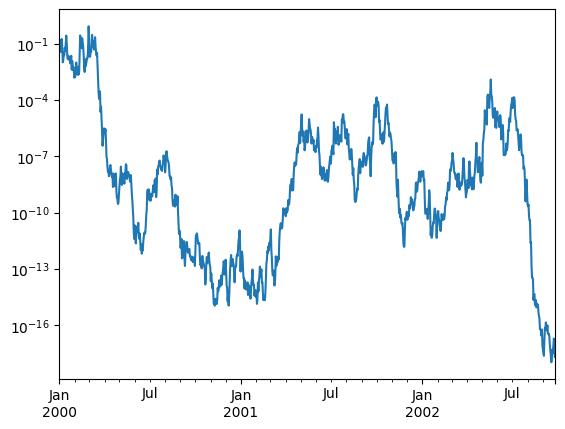

In [9]:
plt.figure();
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True);

Também é possível plotar uma coluna versus outra usando as palavras-chave ``x`` e ``y`` no ``DataFrame.plot``.

<Figure size 640x480 with 0 Axes>

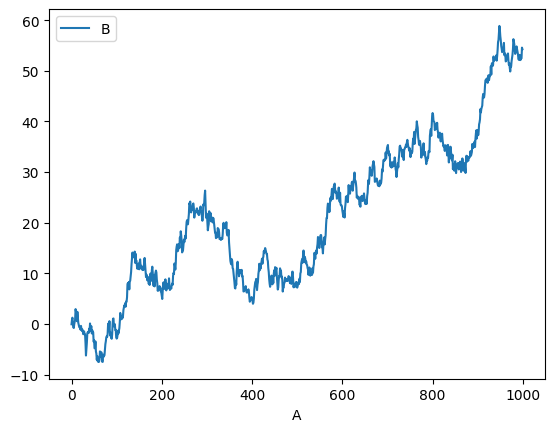

In [10]:
plt.figure();
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B');

Para plotar dados em um eixo ``y`` secundário, use a palavra-chave ``secondary_y``.

<Axes: >

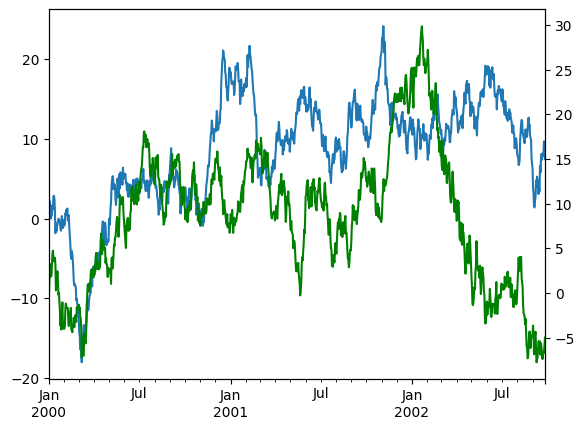

In [13]:
plt.figure();
df.A.plot();
df.B.plot(secondary_y=True, style='g')
#df.B.plot();

Para plotar algumas colunas em um ``DataFrame``, dê os nomes das colunas à palavra-chave ``secondary_y``.

<Figure size 640x480 with 0 Axes>

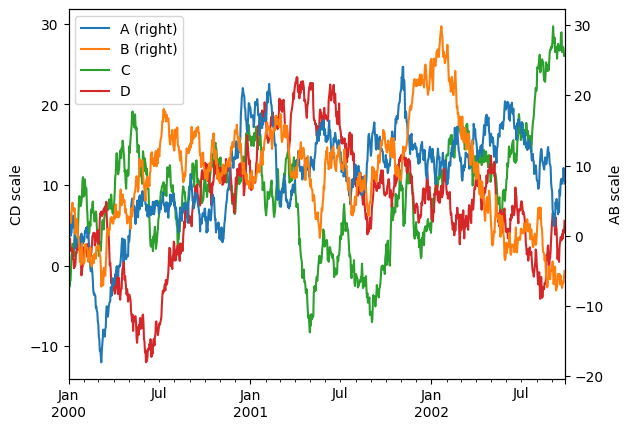

In [14]:
plt.figure();
ax = df.plot(secondary_y=['A', 'B']);
ax.set_ylabel('CD scale');
ax.right_ax.set_ylabel('AB scale');

Repare que as colunas plotadas no eixo ``y`` secundário são automaticamente marcadas com “(right)” na legenda. Para desativar a marcação automática, use a palavra-chave ``mark_right=False``

<Figure size 640x480 with 0 Axes>

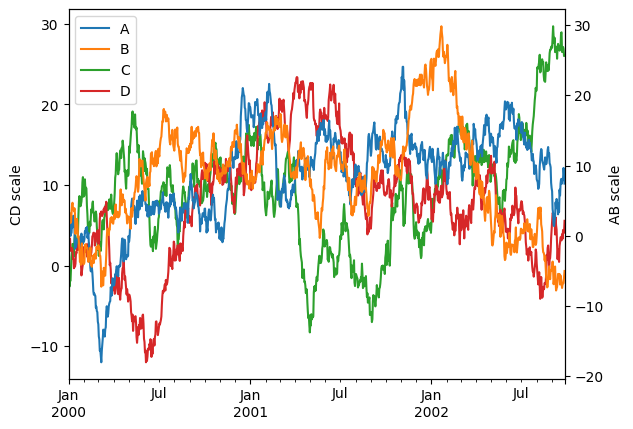

In [15]:
plt.figure();
ax = df.plot(secondary_y=['A', 'B'], mark_right=False);
ax.set_ylabel('CD scale');
ax.right_ax.set_ylabel('AB scale');

__Pandas__ inclui ajuste automático de resolução de _ticks_ para dados de séries temporais de frequência regular. Para casos específicos em que os pandas não podem inferir as informações de frequência, você pode optar por suprimir esse comportamento para fins de alinhamento.

<Axes: >

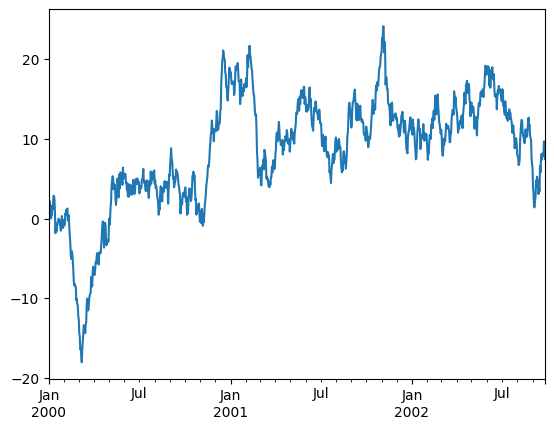

In [16]:
plt.figure()
df.A.plot()

Usando o parâmetro ``x_compat``, você pode modificar este comportamento.

<Axes: >

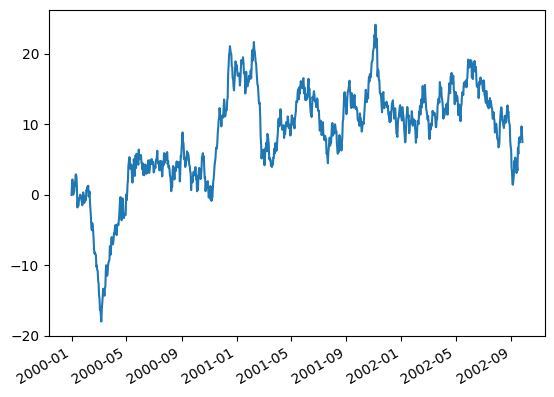

In [17]:
plt.figure()
df.A.plot(x_compat=True)

Você também pode passar um argumento ``ax`` para ``Series.plot`` para plotar em um eixo específico.

Text(0.5, 1.0, 'D')

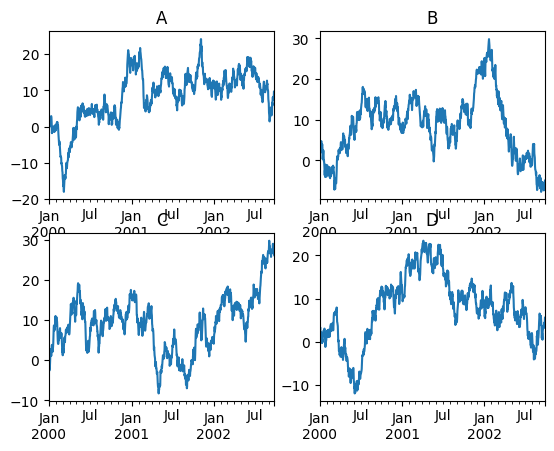

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df['A'].plot(ax=axes[0,0]);
axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]) 
axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); 
axes[1,0].set_title('C')
df['D'].plot(ax=axes[1,1]); 
axes[1,1].set_title('D')

### Gráficos de barra

Para dados rotulados e não de séries temporais, você pode querer produzir um gráfico de barras

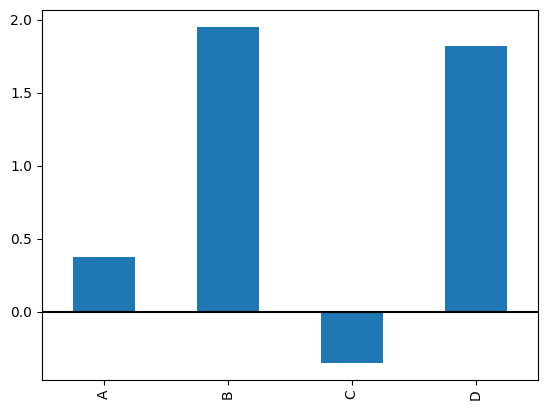

In [19]:
plt.figure();
df.iloc[5].plot(kind='bar'); plt.axhline(0, color='k')

Chamar o método ``plot`` de um ``DataFrame`` com ``kind='bar'`` produz um gráfico de barras múltiplas.

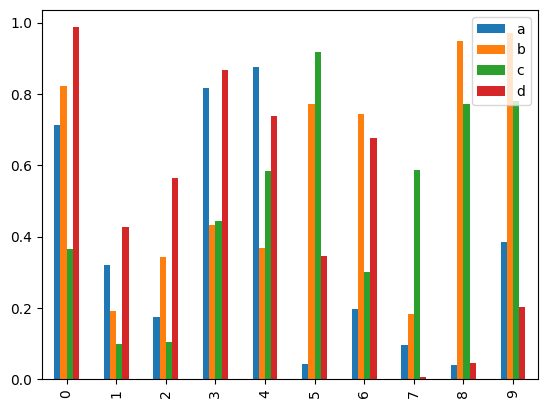

In [20]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='barh');

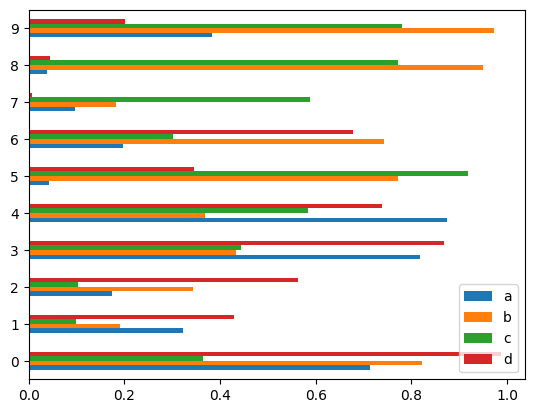

In [23]:
df2.plot(kind='barh');

Para produzir um gráfico de barras empilhadas, passe ``stacked=True``.

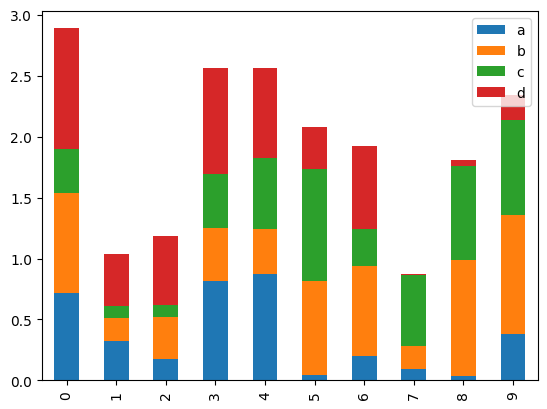

In [21]:
df2.plot(kind='bar', stacked=True);

Para obter gráficos de barras horizontais, passe kind='barh'.

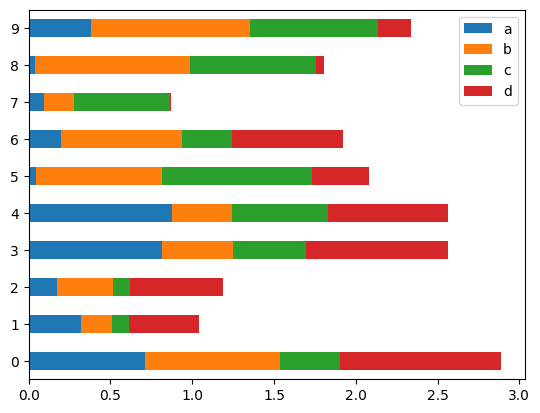

In [22]:
df2.plot(kind='barh', stacked=True);

### Histogramas

<Axes: >

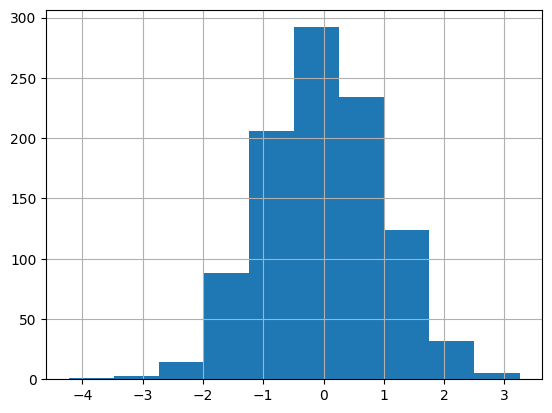

In [24]:
plt.figure();
df['A'].diff().hist()

Para um ``DataFrame``, ``hist`` faz os histogramas das colunas em vários subplots.

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

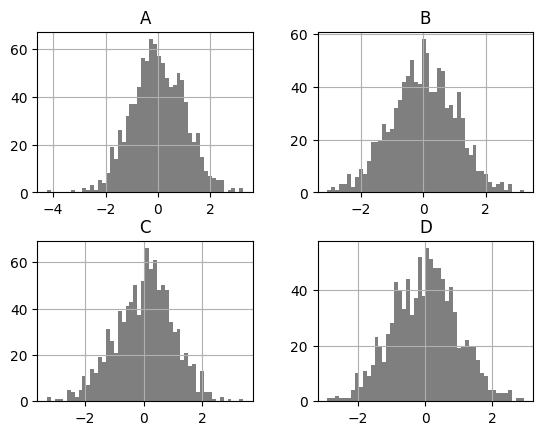

In [25]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

A palavra-chave ``by`` pode ser especificada para plotar histogramas agrupados.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

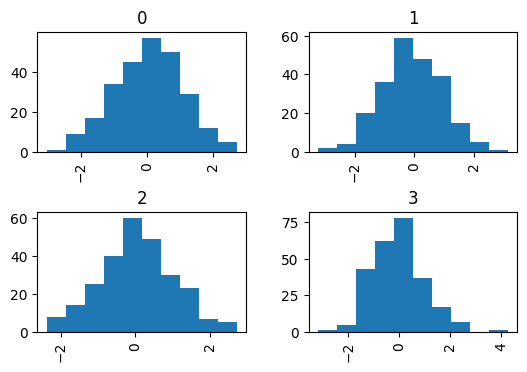

In [26]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

Você pode criar uma matriz de gráfico de dispersão usando o
Método ``scatter_matrix`` do ``pandas.tools.plotting``

array([[<Axes: xlabel='a', ylabel='a'>, <Axes: xlabel='b', ylabel='a'>,
        <Axes: xlabel='c', ylabel='a'>, <Axes: xlabel='d', ylabel='a'>],
       [<Axes: xlabel='a', ylabel='b'>, <Axes: xlabel='b', ylabel='b'>,
        <Axes: xlabel='c', ylabel='b'>, <Axes: xlabel='d', ylabel='b'>],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b', ylabel='c'>,
        <Axes: xlabel='c', ylabel='c'>, <Axes: xlabel='d', ylabel='c'>],
       [<Axes: xlabel='a', ylabel='d'>, <Axes: xlabel='b', ylabel='d'>,
        <Axes: xlabel='c', ylabel='d'>, <Axes: xlabel='d', ylabel='d'>]],
      dtype=object)

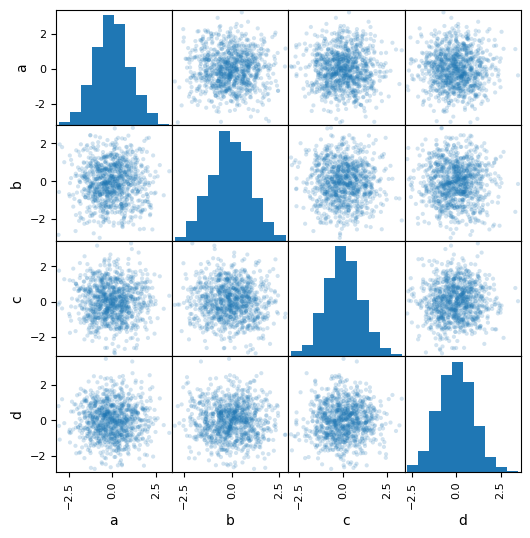

In [28]:
from pandas.plotting import scatter_matrix  

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')